In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('MS_Dhoni_ODI_record.csv')
df.head()


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [4]:
df['opposition'] = df['opposition'].str.replace('v ','',regex=False)

In [5]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [6]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True)

In [7]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236


In [8]:
df['year'] = df['date'].dt.year.astype(int)
df.year

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int32

In [9]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


In [10]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)

In [11]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [12]:
df.drop(columns='odi_number', inplace= True)

In [13]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [14]:
df_new = df.loc[((df['score']!= 'DNB')&(df['score']!= 'TDNB')),'runs_scored':]

In [15]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [16]:
df_new['runs_scored'] =  df_new['runs_scored'].astype(int)
df_new['balls_faced'] =  df_new['balls_faced'].astype(int)
df_new['strike_rate'] =  df_new['strike_rate'].astype(float)
df_new['fours'] =  df_new['fours'].astype(int)
df_new['sixes'] =  df_new['sixes'].astype(int)

In [17]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


Text(0.5, 0, '')

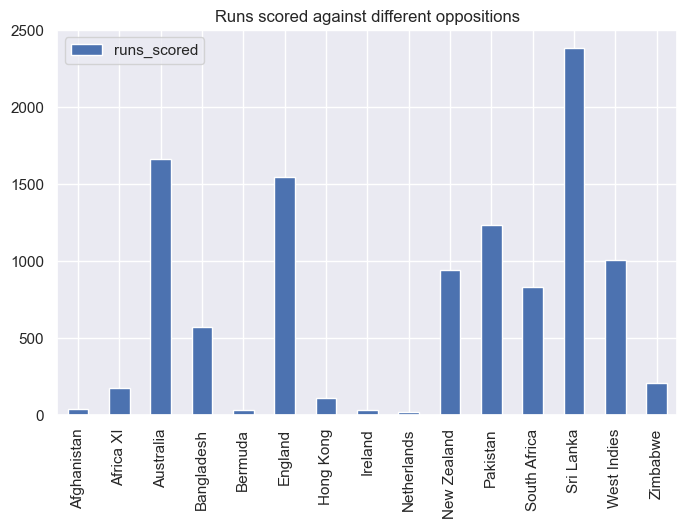

In [80]:
grouped_by_opposition = df_new.groupby('opposition')
sum_of_runs_scored= grouped_by_opposition['runs_scored'].sum()
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition', kind='bar', title= 'Runs scored against different oppositions', figsize=(8,5))
plt.xlabel(None)

<Axes: xlabel='opposition', ylabel='runs_scored'>

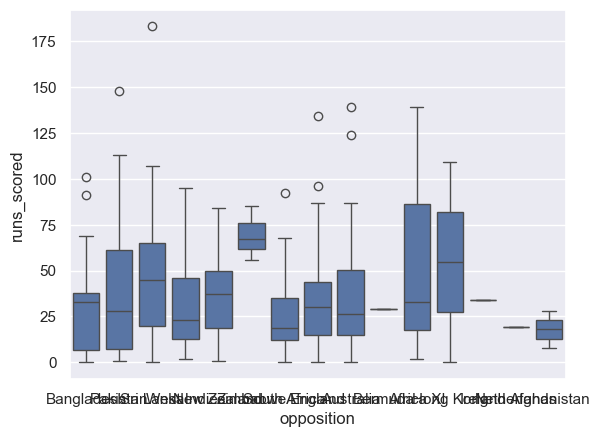

In [81]:
sns.boxplot(x='opposition', y='runs_scored',data=df_new)

In [82]:
opposition_list = ['England','Australia','West Indies', 'South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']

In [83]:
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]

In [84]:
df_filtered = df_filtered.sort_values(by='runs_scored', ascending= False)

In [85]:
df_filtered

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
21,183,145,126.20,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
228,139,121,114.87,12,5,Australia,Mohali,2013-10-19,2013,1
284,134,122,109.83,10,6,England,Cuttack,2017-01-19,2017,0
146,124,107,115.88,9,3,Australia,Nagpur,2009-10-28,2009,0
...,...,...,...,...,...,...,...,...,...,...
74,0,4,0.00,0,0,South Africa,Belfast,2007-06-29,2007,0
273,0,3,0.00,0,0,Australia,Canberra,2016-01-20,2016,0
171,0,1,0.00,0,0,Australia,Visakhapatnam,2010-10-20,2010,0
223,0,4,0.00,0,0,England,Birmingham,2013-06-23,2013,0


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Sri Lanka'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'England'),
  Text(4, 0, 'Bangladesh'),
  Text(5, 0, 'West Indies'),
  Text(6, 0, 'South Africa'),
  Text(7, 0, 'New Zealand')])

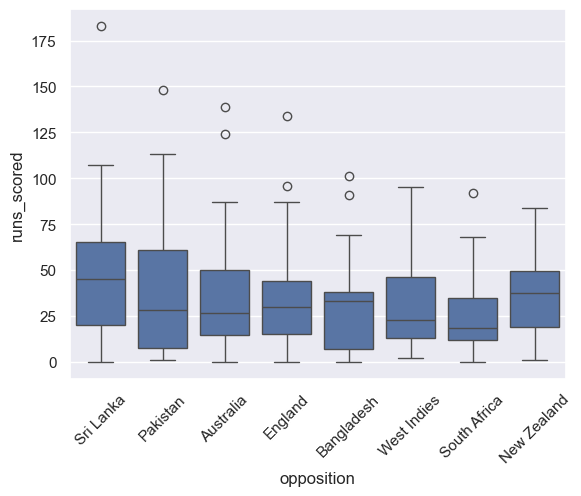

In [86]:
sns.boxplot(x='opposition', y='runs_scored',data = df_filtered)
plt.xticks(rotation=45)

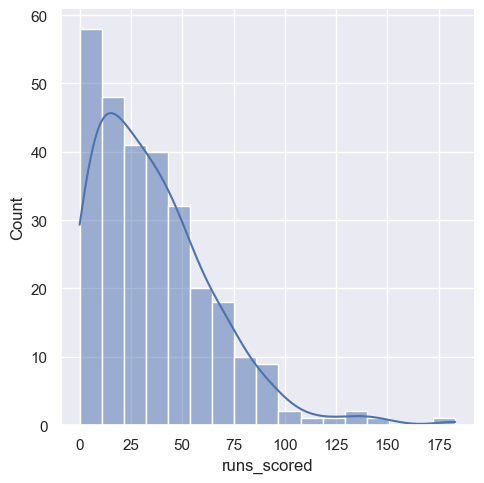

In [87]:
#histogram(distplot) with & without kde(Kernel Density Estimation)
sns.displot(x='runs_scored', data= df_filtered,kde=True)


<Axes: xlabel='runs_scored', ylabel='Count'>

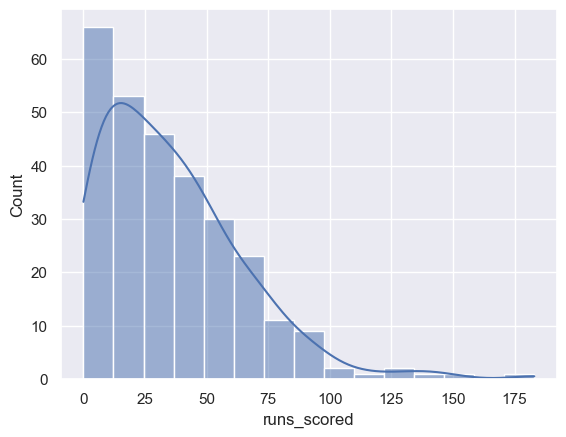

In [88]:
sns.set(style='darkgrid')
sns.histplot(x='runs_scored', data= df_filtered,kde=True,bins=15)

Text(0.5, 1.0, 'KDE')

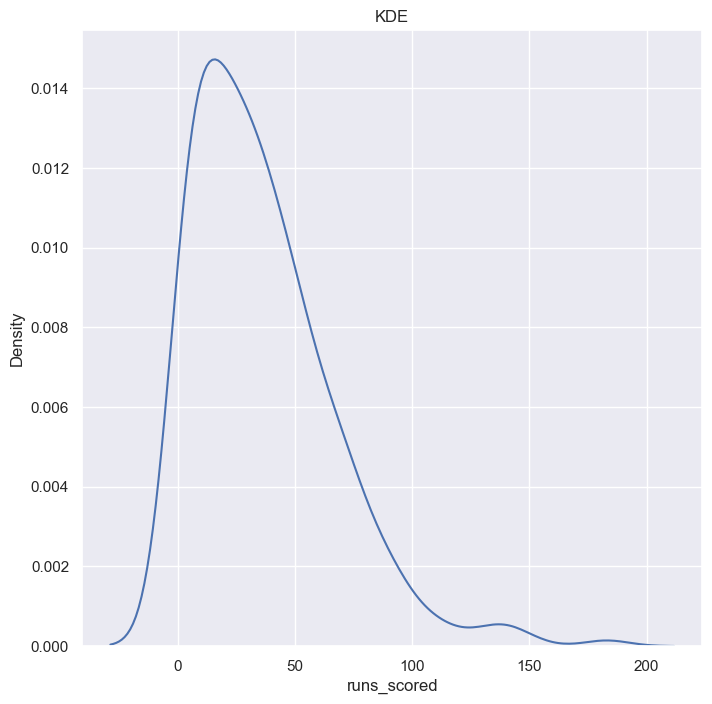

In [89]:
plt.figure(figsize=(8,8))
sns.kdeplot(x='runs_scored',data=df_new)
plt.title("KDE")


Text(0.5, 1.0, 'KDE')

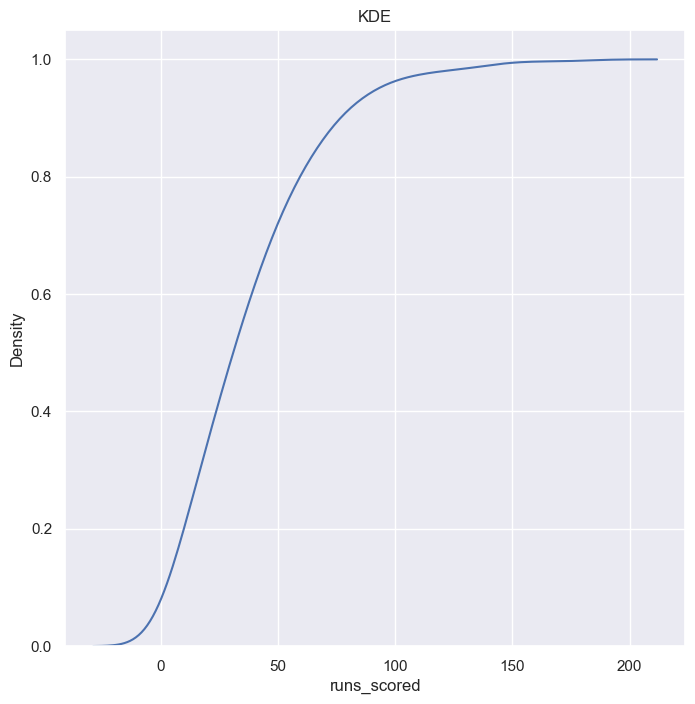

In [90]:
plt.figure(figsize=(8,8))
sns.kdeplot(x='runs_scored',data=df_new,cumulative=True)
plt.title("KDE")

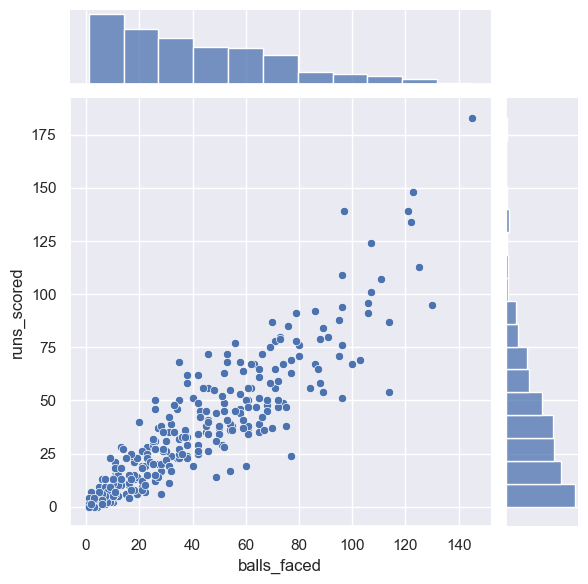

In [91]:
sns.jointplot(x='balls_faced', y='runs_scored',data=df_new, kind='scatter')

<Axes: xlabel='balls_faced', ylabel='runs_scored'>

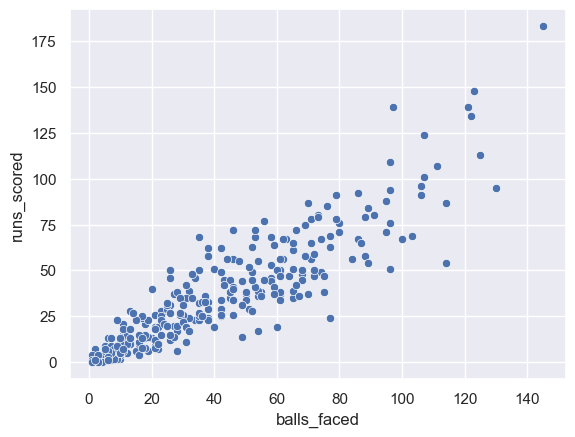

In [92]:
sns.scatterplot(x='balls_faced', y='runs_scored',data=df_new)

In [93]:
matrix = df_new[['balls_faced','runs_scored',]].corr()
matrix

,balls_faced,runs_scored
balls_faced,1.000000,0.894661
runs_scored,0.894661,1.000000


<Axes: >

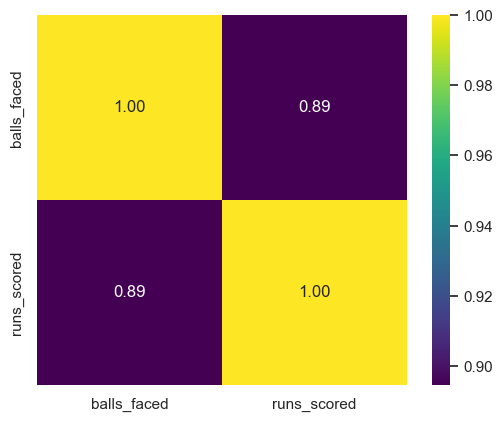

In [94]:
sns.heatmap(data=matrix,annot = True,cmap='viridis', square = True,fmt='.2f')

In [95]:
grouped_by_opposition = df_new.groupby('opposition')
agg_sum= grouped_by_opposition.agg({'balls_faced':'sum', 'runs_scored':'sum'})


In [96]:
agg_sum

,balls_faced,runs_scored
opposition,,
Afghanistan,69,36
Africa XI,139,174
Australia,2052,1660
Bangladesh,682,569
Bermuda,25,29
England,1758,1546
Hong Kong,99,109
Ireland,50,34
Netherlands,40,19


In [97]:
df_strike_rate = agg_sum

df_strike_rate['strike_rate'] = df_strike_rate['runs_scored']*df_strike_rate['balls_faced']/100

<Axes: ylabel='opposition'>

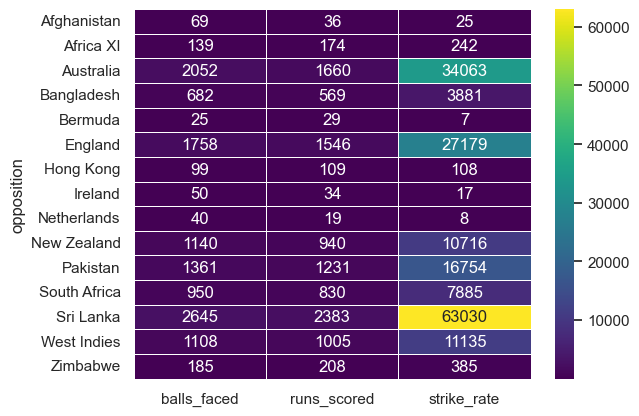

In [98]:
sns.heatmap(df_strike_rate, linewidth= 0.5, annot= True, fmt= '.0f', cmap='viridis')

In [100]:
#Stat Bar Chart
#Problem 1:
# grouped_by_opposition = df.groupby('opposition')
# sum_of_runs_scored= grouped_by_opposition['runs_scored'].sum()
# runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
# runs_scored_by_opposition.plot(x='opposition', kind='bar', title= 'Runs scored against different oppositions', figsize=(8,5))
# plt.xlabel(None);


In [101]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [102]:
df_filtered

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
21,183,145,126.20,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
228,139,121,114.87,12,5,Australia,Mohali,2013-10-19,2013,1
284,134,122,109.83,10,6,England,Cuttack,2017-01-19,2017,0
146,124,107,115.88,9,3,Australia,Nagpur,2009-10-28,2009,0
...,...,...,...,...,...,...,...,...,...,...
74,0,4,0.00,0,0,South Africa,Belfast,2007-06-29,2007,0
273,0,3,0.00,0,0,Australia,Canberra,2016-01-20,2016,0
171,0,1,0.00,0,0,Australia,Visakhapatnam,2010-10-20,2010,0
223,0,4,0.00,0,0,England,Birmingham,2013-06-23,2013,0


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Sri Lanka'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'England'),
  Text(4, 0, 'Bangladesh'),
  Text(5, 0, 'West Indies'),
  Text(6, 0, 'South Africa'),
  Text(7, 0, 'New Zealand')])

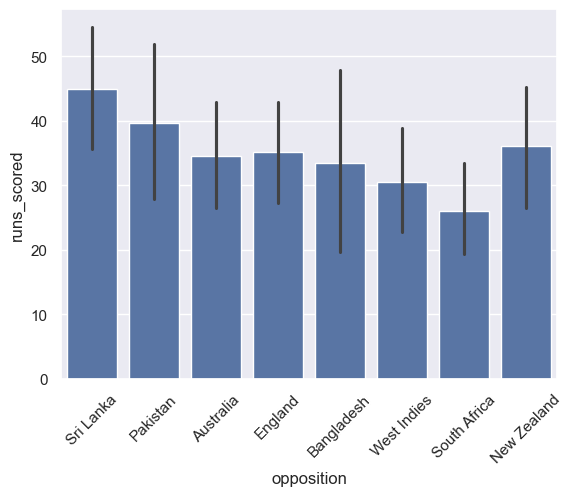

In [103]:
sns.barplot(x='opposition', y='runs_scored',data = df_filtered)
plt.xticks(rotation=45)

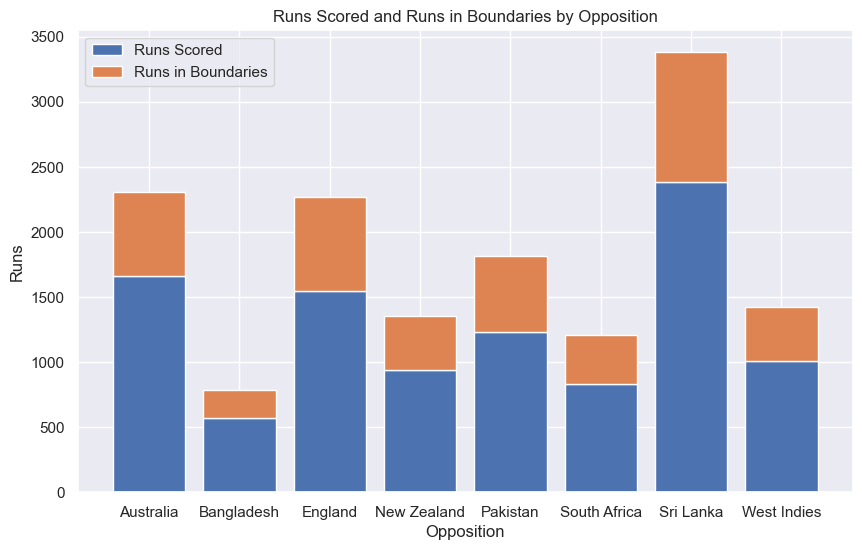

In [118]:
df_boundaries= df_filtered[['opposition', 'runs_scored', 'fours', 'sixes']].copy()
df_boundaries['runs_in_boundaries'] = (4*df_boundaries['fours'])+(6*df_boundaries['sixes'])
df_boundaries_selected = df_boundaries[['opposition','runs_scored','runs_in_boundaries']].copy()

grouped_by_opposition = df_boundaries_selected.groupby('opposition')
df_boundaries_grouped = grouped_by_opposition.sum().reset_index()

#stacked bar plot
plt.figure(figsize=(10,6))
plt.bar(df_boundaries_grouped['opposition'], df_boundaries_grouped['runs_scored'],label='Runs Scored')
plt.bar(df_boundaries_grouped['opposition'], df_boundaries_grouped['runs_in_boundaries'], bottom= df_boundaries_grouped['runs_scored'], label= 'Runs in Boundaries')
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title('Runs Scored and Runs in Boundaries by Opposition')
plt.legend()
plt.show()